In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import mlrose_hiive
import sklearn
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from functools import partial
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,6])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
np.random.seed(50)
df2023 = pd.read_csv(f"./datasets/2023_geoid_sociodem_crime.csv")
df2023 = df2023.dropna()
def descthis(df):
    print(df.info())
    print(df.shape)
    print(df.isna().any().any())
descthis(df2023)

<class 'pandas.core.frame.DataFrame'>
Index: 208889 entries, 0 to 208888
Data columns (total 25 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Arrest                                        208889 non-null  bool   
 1   Date                                          208889 non-null  object 
 2   Location Description                          208889 non-null  object 
 3   Primary Type                                  208889 non-null  object 
 4   Community Area                                208889 non-null  int64  
 5   District                                      208889 non-null  int64  
 6   Hardship Index                                208889 non-null  int64  
 7   Iucr                                          208889 non-null  int64  
 8   Latitude                                      208889 non-null  float64
 9   Longitude                                     208889 

In [3]:
df2023['Date'] = pd.to_datetime(df2023['Date'])
df2023['date2'] = pd.to_datetime(df2023['date2'])

In [4]:
print(df2023["Primary Type"].unique())

['ROBBERY' 'ASSAULT' 'BATTERY' 'BURGLARY' 'THEFT' 'MOTOR VEHICLE THEFT'
 'CRIMINAL DAMAGE' 'CRIMINAL TRESPASS' 'CRIMINAL SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'ARSON' 'WEAPONS VIOLATION' 'SEX OFFENSE'
 'KIDNAPPING' 'HOMICIDE' 'NARCOTICS' 'PUBLIC PEACE VIOLATION' 'STALKING'
 'INTIMIDATION' 'PUBLIC INDECENCY' 'PROSTITUTION' 'OBSCENITY'
 'HUMAN TRAFFICKING']


In [5]:
sampledf = df2023.sample(n=2000, random_state=42)
sampledf.to_csv(f"./tables/sampledf_2023.csv",index=False)

In [6]:
def categorize(data):
    from sklearn.preprocessing import LabelEncoder
    label_encoders = {}
    
    categorical_columns = ["Arrest", "Location Description", "Primary Type"]
    for column in categorical_columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    print(data[categorical_columns].head())
    for column, le in label_encoders.items():
        print(f"Mapping for {column}:")
        print(dict(zip(le.classes_, le.transform(le.classes_))))
    return data, label_encoders
    
df2023, label_encoders = categorize(df2023)

   Arrest  Location Description  Primary Type
0       0                   117            18
1       0                   117             1
2       0                   117             1
3       0                   100             2
4       0                    95             3
Mapping for Arrest:
{False: 0, True: 1}
Mapping for Location Description:
{'ABANDONED BUILDING': 0, 'AIRCRAFT': 1, 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 2, 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 3, 'AIRPORT EXTERIOR - NON-SECURE AREA': 4, 'AIRPORT EXTERIOR - SECURE AREA': 5, 'AIRPORT PARKING LOT': 6, 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 7, 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 8, 'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 9, 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 10, 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 11, 'AIRPORT TRANSPORTATION SYSTEM (ATS)': 12, 'AIRPORT VENDING ESTABLISHMENT': 13, 'AIRPORT/AIRCRAFT': 14, 'ALLEY': 15, 'ANIMAL HOSPITAL': 16, 'APA

## Predictions

In [7]:
data = df2023.copy()

In [8]:
# Step 2: Define the target variable and features
target = 'Primary Type'  # Predicting the type of crime
features = data.drop(columns=['Primary Type', 'Date', 'time', 'date2'])  # Drop target and unnecessary columns
X = features
y = data[target]

In [9]:
# Step 3: Handle rare categories by grouping
threshold = 10  # Define a threshold for rare categories
primary_type_counts = y.value_counts()
rare_categories = primary_type_counts[primary_type_counts < threshold].index
y_grouped = y.replace(rare_categories, len(primary_type_counts))  # Group rare categories into "Other"


In [10]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped
)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
# Step 5: Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

In [13]:
# Step 7: Evaluate the model
grouped_report = classification_report(y_test, y_pred)
print("Classification Report:\n", grouped_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.17      0.29       153
           1       0.98      1.00      0.99      5305
           2       0.99      1.00      1.00     12682
           3       0.98      0.98      0.98      2238
           4       0.93      0.99      0.96      8996
           5       0.98      0.92      0.95       485
           6       0.83      0.80      0.81      1411
           7       0.99      0.84      0.91       188
           9       0.55      0.09      0.15        70
          10       0.00      0.00      0.00        42
          11       0.99      1.00      0.99      8744
          12       0.97      0.96      0.96      1547
          13       0.00      0.00      0.00        11
          14       0.72      0.63      0.67       503
          15       0.95      0.90      0.93        63
          17       0.90      0.22      0.36       258
          18       0.97      1.00      0.98      1482
   

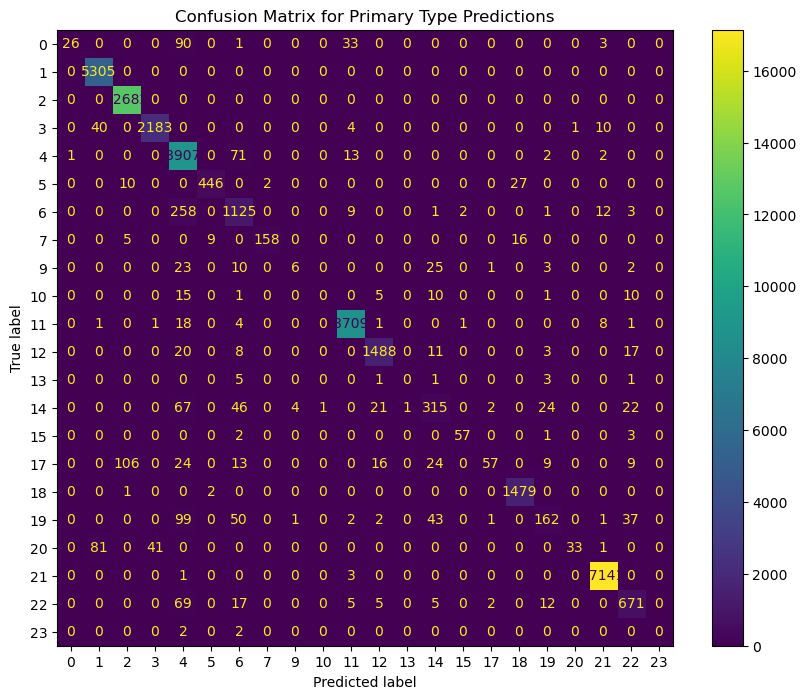

In [14]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_grouped))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='viridis')
plt.title('Confusion Matrix for Primary Type Predictions')
plt.savefig('./images/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Step 9: Precision, Recall, F1-score Bar Chart
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)


In [16]:
# Map the original class names (including "Other")
original_classes = list(label_encoders['Primary Type'].classes_)
original_classes.append("Other")  # Add "Other" for the grouped rare categories
labels = [original_classes[int(cls)] if int(cls) < len(original_classes) else "Other" for cls in np.unique(y_test)]


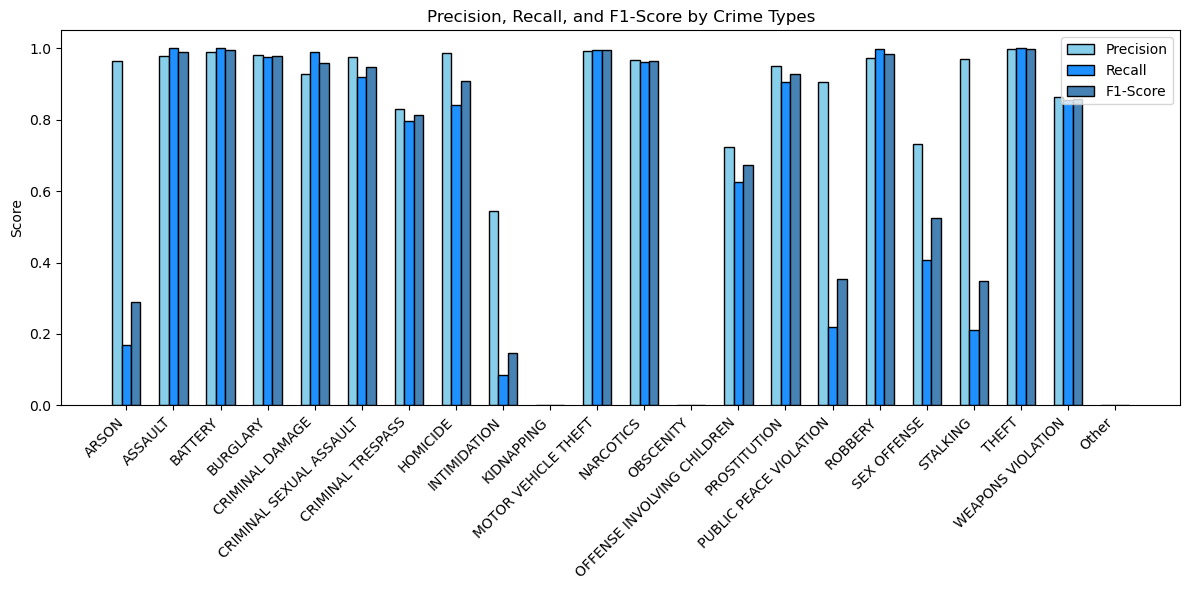

In [17]:
# Plot the bar chart
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['skyblue', 'dodgerblue', 'steelblue']
ax.bar(x - 0.2, precision, width=0.2, label='Precision', color=colors[0], edgecolor='black')
ax.bar(x, recall, width=0.2, label='Recall',color=colors[1], edgecolor='black')
ax.bar(x + 0.2, f1_score, width=0.2, label='F1-Score',color=colors[2], edgecolor='black')
# Add labels and legend
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Crime Types')
ax.legend()
plt.tight_layout()
plt.savefig('./images/precision_recall_f1_scores.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Correlations between socio-demographic and crime type

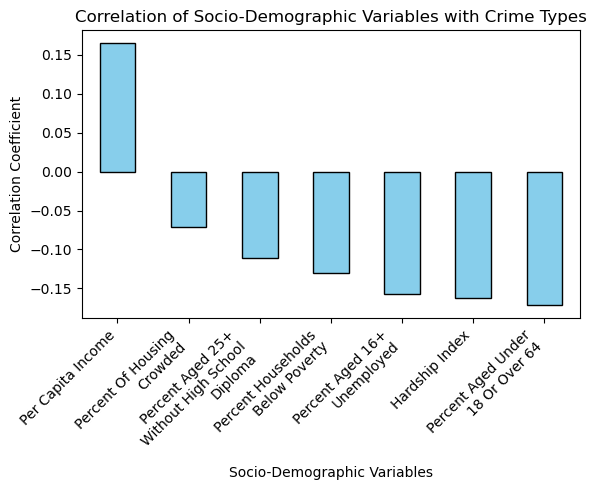

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your dataset already loaded and processed

# Step 1: Extract socio-demographic data and the target variable
socio_demographic_columns = [
    "Hardship Index",
    "Per Capita Income",
    "Percent Aged 16+ Unemployed",
    "Percent Aged 25+ Without High School Diploma",
    "Percent Aged Under 18 Or Over 64",
    "Percent Households Below Poverty",
    "Percent Of Housing Crowded"
]

socio_data = data[socio_demographic_columns + ["Primary Type"]]
correlation_matrix = socio_data.corr()
correlations_with_target = correlation_matrix["Primary Type"].drop("Primary Type")
correlations_with_target_sorted = correlations_with_target.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(6,5))
correlations_with_target_sorted.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
plt.title("Correlation of Socio-Demographic Variables with Crime Types")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Socio-Demographic Variables")
tick_labels = correlations_with_target_sorted.index.str.wrap(20)  # Wrap labels to two rows
ax.set_xticklabels(tick_labels, rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.savefig('./images/correlations_socio_crimes.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### Regression analysis

In [19]:
import statsmodels.api as sm
import pandas as pd

# One-hot encode the target variable "Primary Type" for regression analysis
primary_type_encoded = pd.get_dummies(data["Primary Type"], prefix="PrimaryType")

# Merge encoded target with socio-demographic variables
socio_demo_reg_data = pd.concat([data[socio_demographic_columns], primary_type_encoded], axis=1)

# Initialize a dictionary to store regression results
regression_results = {}

# Perform regression for each class in "Primary Type"
for class_col in primary_type_encoded.columns:
    # Define the dependent variable (current class) and independent variables
    y = socio_demo_reg_data[class_col]
    X = sm.add_constant(socio_demo_reg_data[socio_demographic_columns])  # Add constant for intercept

    # Fit the model
    model = sm.OLS(y, X).fit()

    # Store the summary of the regression
    regression_results[class_col] = model.summary()

# Display summaries for all regressions
for class_col, summary in regression_results.items():
    print(f"Regression Analysis for {class_col}")
    print(summary)
    print("\n" + "="*80 + "\n")


Regression Analysis for PrimaryType_0
                            OLS Regression Results                            
Dep. Variable:          PrimaryType_0   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     16.16
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           2.08e-21
Time:                        14:05:06   Log-Likelihood:             3.3196e+05
No. Observations:              208889   AIC:                        -6.639e+05
Df Residuals:                  208881   BIC:                        -6.638e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

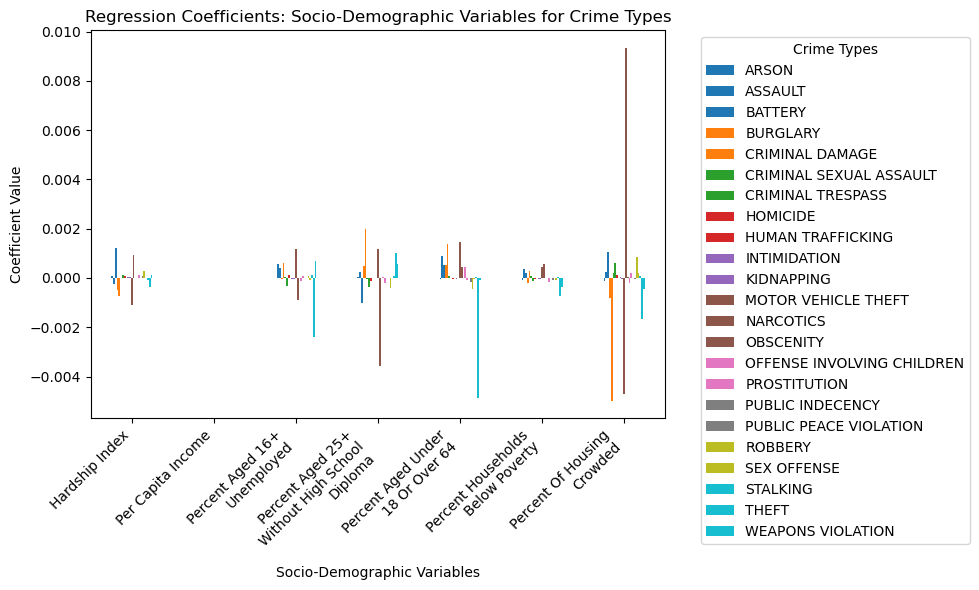

In [20]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd


primary_type_encoded = pd.get_dummies(data["Primary Type"], prefix="PrimaryType")

socio_demo_reg_data = pd.concat([data[socio_demographic_columns], primary_type_encoded], axis=1)

coefficients = {}
p_values = {}

for class_col in primary_type_encoded.columns:
    y = socio_demo_reg_data[class_col]
    X = sm.add_constant(socio_demo_reg_data[socio_demographic_columns])  # Add constant for intercept
    model = sm.OLS(y, X).fit()
    coefficients[class_col] = model.params
    p_values[class_col] = model.pvalues

coefficients_df = pd.DataFrame(coefficients).drop("const", errors='ignore')  # Exclude the intercept
p_values_df = pd.DataFrame(p_values).drop("const", errors='ignore')  # Exclude the intercept

coefficients_df.columns = original_classes[:len(coefficients_df.columns)]
p_values_df.columns = original_classes[:len(p_values_df.columns)]

fig, ax = plt.subplots(figsize=(10, 6))
coefficients_df.plot(kind='bar', ax=ax, colormap='tab10')

plt.title("Regression Coefficients: Socio-Demographic Variables for Crime Types")
plt.ylabel("Coefficient Value")
plt.xlabel("Socio-Demographic Variables")
tick_labels = coefficients_df.index.str.wrap(20)  # Wrap x-tick labels into two rows
ax.set_xticklabels(tick_labels, rotation=45, ha="right", fontsize=10)
plt.legend(title="Crime Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./images/regression_coeffs.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
binary_significance = (p_values_df < 0.05).astype(int)

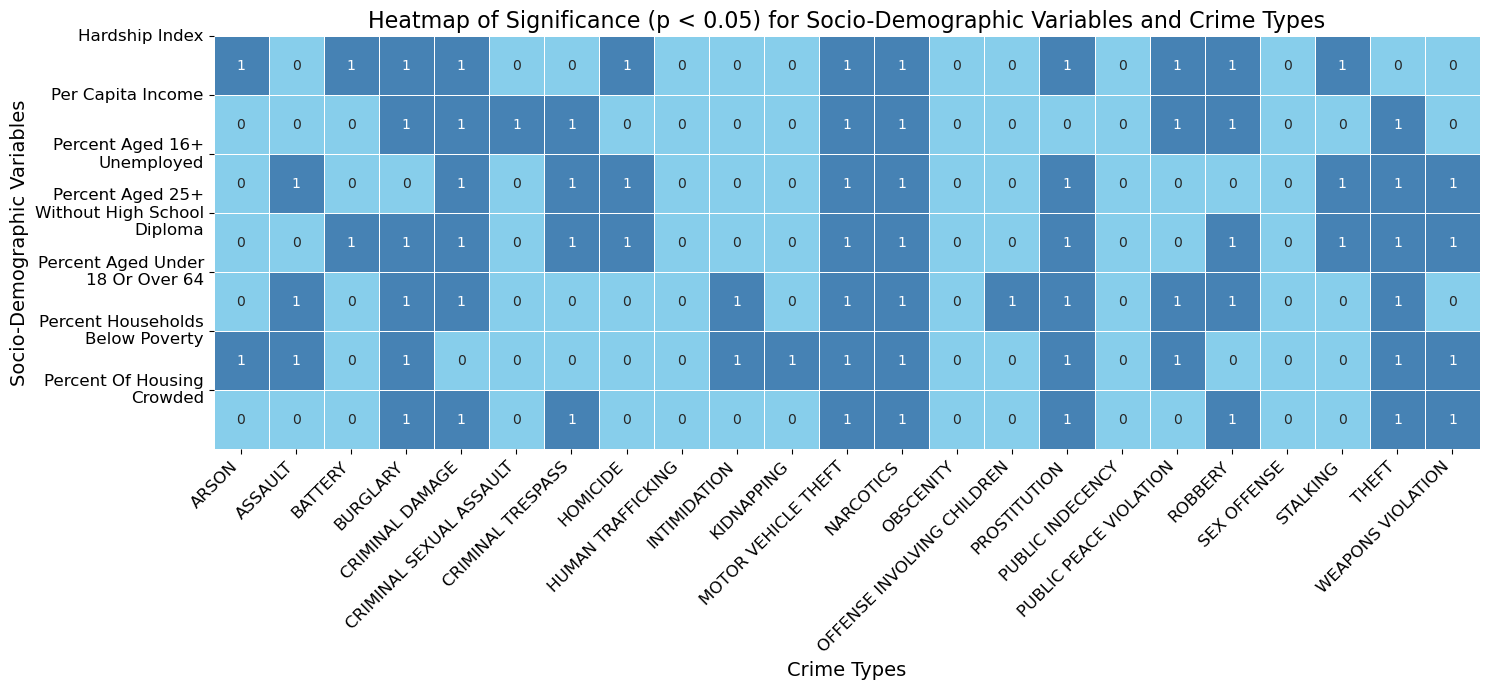

In [22]:
import seaborn as sns

# Plot a heatmap for binary significance
plt.figure(figsize=(15, 7))
custom_cmap = sns.color_palette(["skyblue", "steelblue"])
sns.heatmap(binary_significance, annot=True, cmap=custom_cmap, cbar=False, linewidths=0.5)

# Customize heatmap
plt.title("Heatmap of Significance (p < 0.05) for Socio-Demographic Variables and Crime Types", fontsize=16)
plt.ylabel("Socio-Demographic Variables", fontsize=14)
plt.xlabel("Crime Types", fontsize=14)

# Format y-tick labels to wrap into two rows and adjust fontsize
y_tick_labels = binary_significance.index.str.wrap(20)
plt.yticks(ticks=range(len(y_tick_labels)), labels=y_tick_labels, rotation=0, fontsize=12)

# Format x-tick labels to adjust fontsize
plt.xticks(fontsize=12, rotation=45, ha="right")

plt.tight_layout()
plt.savefig('./images/heatmap_significance.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


## Day of week counts by Crime Types

In [23]:
def output_data(df, crime_types, year):
    ctstr = '_'.join(crime_types)
    tdf = df.copy()
    if crime_types:
        tdf = df[df["Primary Type"].isin(crime_types)]
    tdf = tdf[tdf['year'] == year]
    # print(tdf.shape)
    tdf.to_csv(f"./tables/{year}_{ctstr}.csv",index=False)
    return tdf




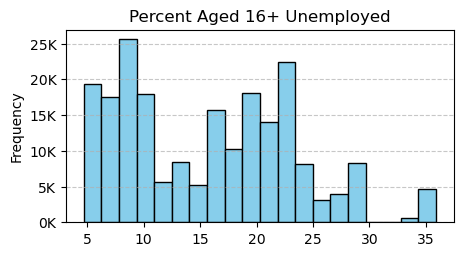

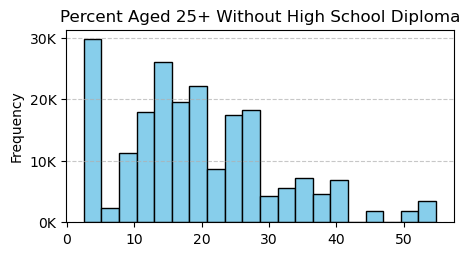

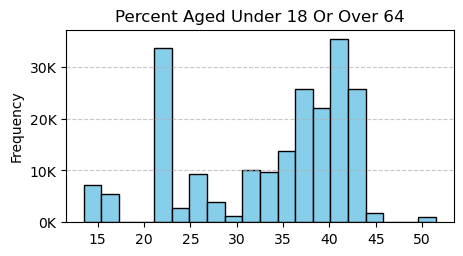

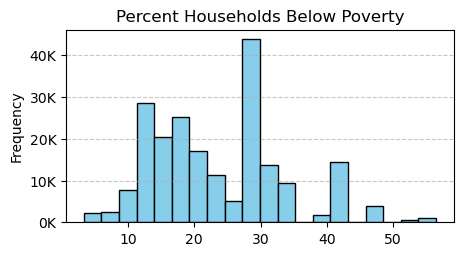

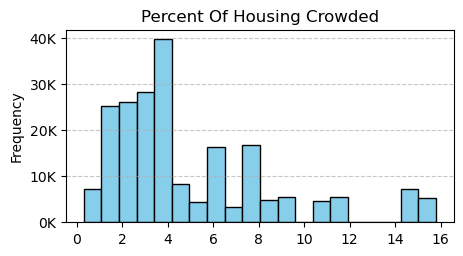

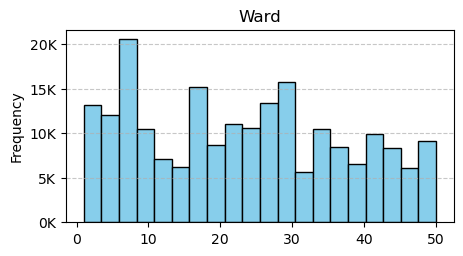

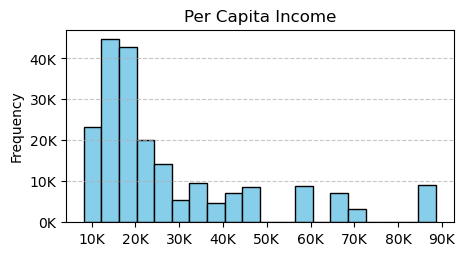

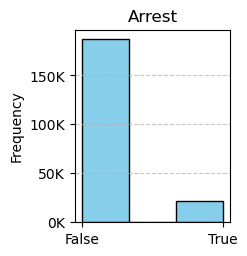

In [24]:
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'

def hist_vars(df):
    varss = ["Percent Aged 16+ Unemployed", "Percent Aged 25+ Without High School Diploma","Percent Aged Under 18 Or Over 64","Percent Households Below Poverty",
             "Percent Of Housing Crowded","Ward","Per Capita Income",'Arrest']#,"Proportion of Arrests"]
    
    for var in varss:

        if var =='Arrest':
            plt.figure(figsize=(2,2.5))
            plt.hist(df[var], bins=3, color='skyblue', edgecolor='black')
        else:
            plt.figure(figsize=(5,2.5))
            plt.hist(df[var], bins=20, color='skyblue', edgecolor='black') 

        plt.title(var)#, fontsize=16)
        plt.ylabel('Frequency')#, fontsize=12)
        
        # Show the histogram
        plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        x_ticks = plt.gca().get_xticks()
        if var == 'Per Capita Income':
            plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
        
        if var =='Arrest':
            plt.gca().set_xticks([0, 1])
            plt.gca().set_xticklabels(["False", "True"])
            
        plt.savefig(f"./images/{var}.png", dpi=300, bbox_inches='tight')
        plt.show()
        
hist_vars(df2023)



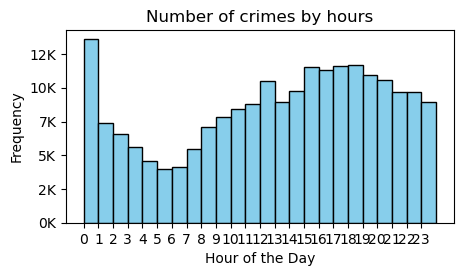

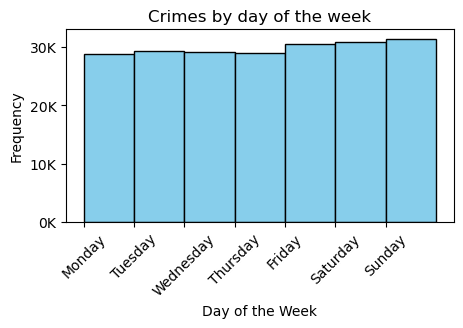

In [25]:
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'
def hist_crimes(df):
    
    plt.figure(figsize=(5,2.5))
    
    df['time_hour'] = df['Date'].dt.hour
    plt.hist(df['time_hour'], bins=24, edgecolor='black', color='skyblue', range=(0, 24))
    plt.xticks(range(0, 24))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.title('Number of crimes by hours')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.savefig('./images/crimes_by_hours.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Draw a histogram of the 'day_of_week' column
    plt.figure(figsize=(5,2.5))
    df['day_of_week_num'] = df['Date'].dt.dayofweek
    plt.hist(df['day_of_week_num'], bins=7, edgecolor='black', color='skyblue', range=(0, 7))
    plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
    plt.xlabel('Day of the Week')
    plt.ylabel('Frequency')
    plt.title('Crimes by day of the week')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    plt.savefig('./images/crimes_by_dayofweek.png', dpi=300, bbox_inches='tight')
    plt.show()
hist_crimes(df2023)